In [ ]:
'''
LSTM

forget gate layer 망각 게이트

전 셀값을 얼마나 전달할지 시그모이드 함수를 통해 0~1을 곱함 ex) 0 전달하지 않음, 0.5 반만 전달, 1 전부 전달

input gate layer 입력 게이트

현재 셀에 입력되는 새로운 정보를 어느정도 전달할 것인가
'''

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
import FinanceDataReader as fdr

In [84]:
kakao = fdr.DataReader('035720') #kako

In [85]:
kakao

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-11-11,999,999,999,999,12,NaN
1999-11-12,1115,1115,1115,1115,140,0.116116
1999-11-15,1249,1249,1249,1249,405,0.120179
1999-11-16,1396,1396,1396,1396,214,0.117694
1999-11-17,1561,1561,1561,1561,191,0.118195
...,...,...,...,...,...,...
2023-11-01,38000,38300,37450,37600,1272093,-0.005291
2023-11-02,38000,38600,37900,38550,1529650,0.025266
2023-11-03,39250,41550,38900,41300,3675484,0.071336


In [86]:
kakao.index

DatetimeIndex(['1999-11-11', '1999-11-12', '1999-11-15', '1999-11-16',
               '1999-11-17', '1999-11-18', '1999-11-19', '1999-11-22',
               '1999-11-23', '1999-11-24',
               ...
               '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-30',
               '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03',
               '2023-11-06', '2023-11-07'],
              dtype='datetime64[ns]', name='Date', length=5921, freq=None)

In [87]:
kakao['year'] = kakao.index.year

In [88]:
kakao['month'] = kakao.index.month

In [89]:
kakao['day'] = kakao.index.day

In [90]:
kakao

,Open,High,Low,Close,Volume,Change,year,month,day
Date,,,,,,,,,
1999-11-11,999,999,999,999,12,NaN,1999,11,11
1999-11-12,1115,1115,1115,1115,140,0.116116,1999,11,12
1999-11-15,1249,1249,1249,1249,405,0.120179,1999,11,15
1999-11-16,1396,1396,1396,1396,214,0.117694,1999,11,16
1999-11-17,1561,1561,1561,1561,191,0.118195,1999,11,17
...,...,...,...,...,...,...,...,...,...
2023-11-01,38000,38300,37450,37600,1272093,-0.005291,2023,11,1
2023-11-02,38000,38600,37900,38550,1529650,0.025266,2023,11,2
2023-11-03,39250,41550,38900,41300,3675484,0.071336,2023,11,3


Text(0, 0.5, 'price')

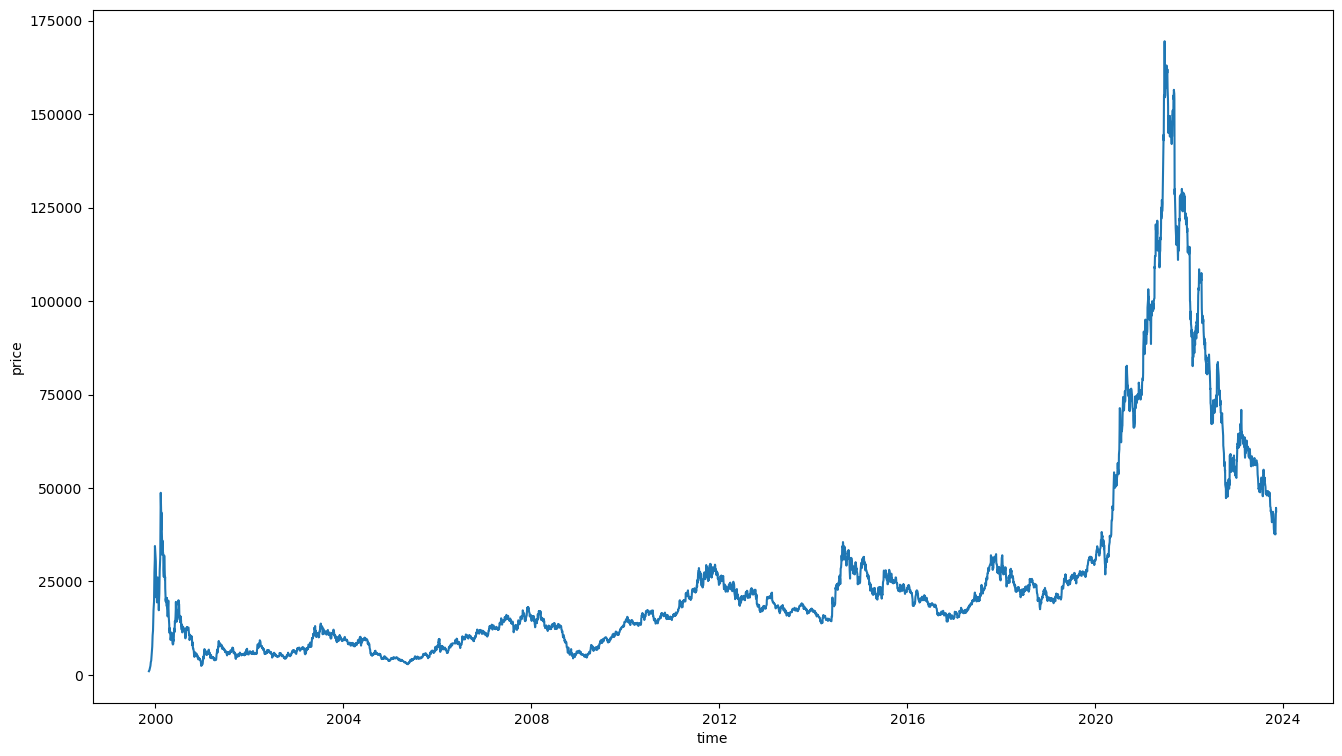

In [91]:
plt.figure(figsize=(16,9))
sns.lineplot(y=kakao['Close'], x=kakao.index)
plt.xlabel('time')
plt.ylabel('price')

In [92]:
ts = [['2000', '2010'],
      ['2010', '2015'],
      ['2015', '2020'],
      ['2020', '2023']]

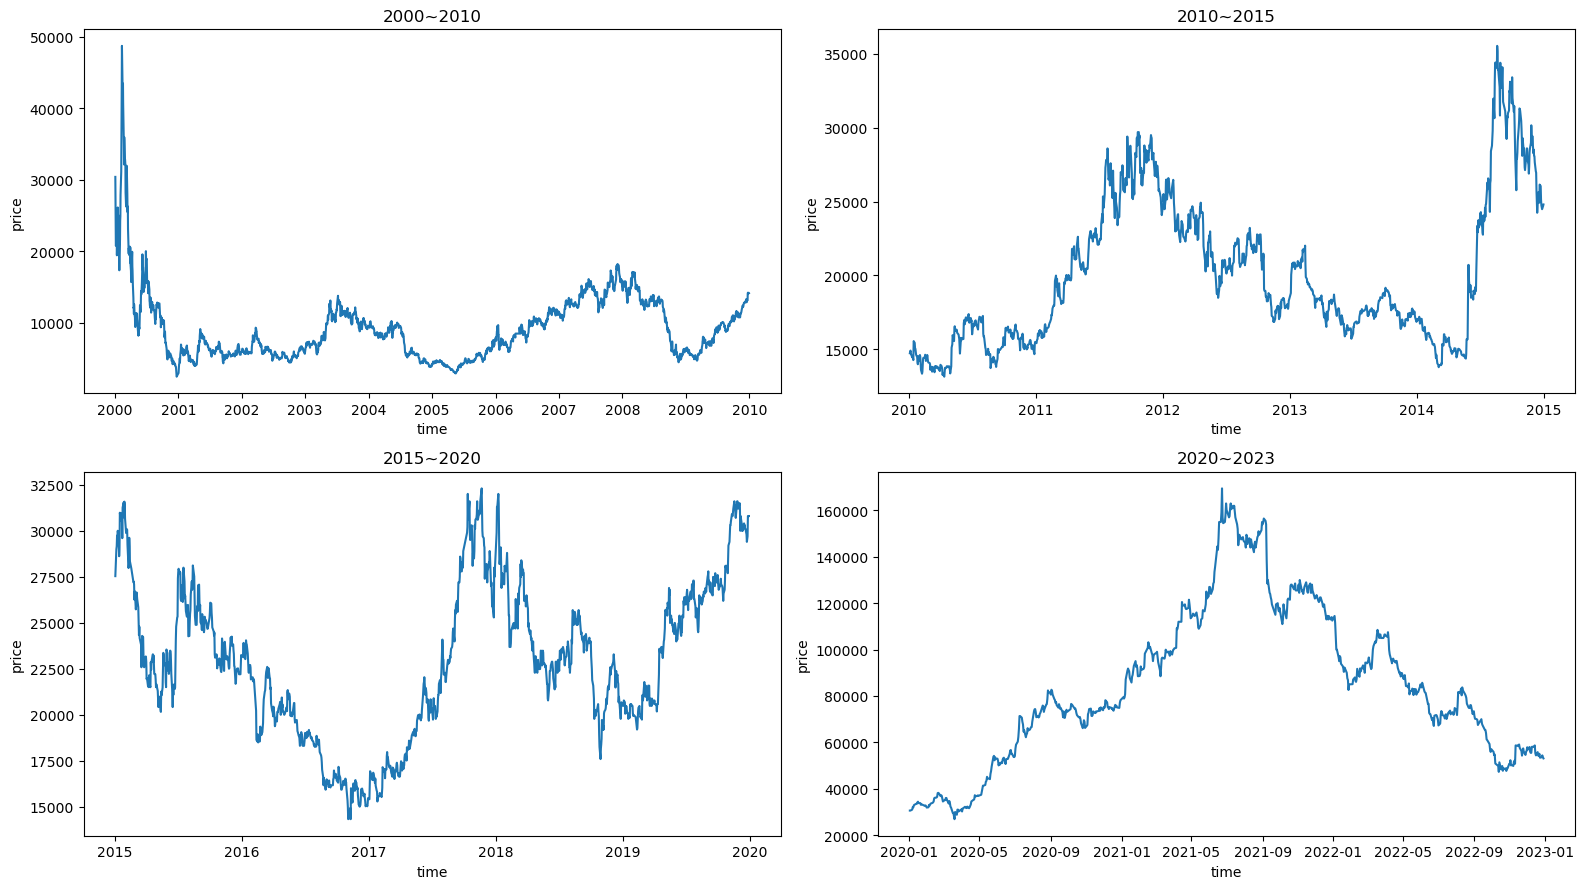

In [93]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(16,9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = kakao.loc[(kakao.index > ts[i][0]) & (kakao.index <ts[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{ts[i][0]}~{ts[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout() # 그래프들 사이 간격 주기

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
scaler = MinMaxScaler()

In [96]:
cols = ['Open', 'High', 'Low', 'Close', 'Volume']

In [97]:
scaled = scaler.fit_transform(kakao[cols])
scaled

array([[5.80813953e-03, 5.77456647e-03, 6.20496894e-03, 0.00000000e+00,
        6.35083673e-07],
       [6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 6.88423214e-04,
        7.40930952e-06],
       [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 1.48367072e-03,
        2.14340740e-05],
       ...,
       [2.28197674e-01, 2.40173410e-01, 2.41614907e-01, 2.39173655e-01,
        1.94519990e-01],
       [2.50000000e-01, 2.58381503e-01, 2.62732919e-01, 2.59351577e-01,
        2.57792688e-01],
       [2.59883721e-01, 2.58670520e-01, 2.66149068e-01, 2.53713628e-01,
        1.06836686e-01]])

In [98]:
df = pd.DataFrame(scaled, columns=cols)

In [99]:
df

,Open,High,Low,Close,Volume
0,0.005808,0.005775,0.006205,0.000000,6.350837e-07
1,0.006483,0.006445,0.006925,0.000688,7.409310e-06
2,0.007262,0.007220,0.007758,0.001484,2.143407e-05
3,0.008116,0.008069,0.008671,0.002356,1.132566e-05
4,0.009076,0.009023,0.009696,0.003335,1.010842e-05
...,...,...,...,...,...
5916,0.220930,0.221387,0.232609,0.217215,6.732379e-02
5917,0.220930,0.223121,0.235404,0.222853,8.095465e-02
5918,0.228198,0.240173,0.241615,0.239174,1.945200e-01
5919,0.250000,0.258382,0.262733,0.259352,2.577927e-01


In [100]:
from sklearn.model_selection import train_test_split

In [101]:
xtrain, xtest, ytrain, ytest=train_test_split(df.drop('Close',1), df['Close'], test_size=0.2, random_state=0, shuffle=False )

C:\Users\user\AppData\Local\Temp\ipykernel_12728\3045550222.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  xtrain, xtest, ytrain, ytest=train_test_split(df.drop('Close',1), df['Close'], test_size=0.2, random_state=0, shuffle=False )


In [102]:
xtrain.shape

(4736, 4)

In [104]:
ytrain.shape

(4736,)

In [ ]:
# window단위로 데이터를 나눈다

In [105]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size): #window의 갯수
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [106]:
xtrain, ytrain = make_dataset(xtrain, ytrain, 20)

In [107]:
xtrain

array([[[5.80813953e-03, 5.77456647e-03, 6.20496894e-03, 6.35083673e-07],
        [6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 7.40930952e-06],
        [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05],
        ...,
        [3.92151163e-02, 3.89884393e-02, 4.18944099e-02, 1.20612974e-04],
        [4.38837209e-02, 4.36300578e-02, 4.68819876e-02, 9.83321221e-05],
        [4.91279070e-02, 4.88439306e-02, 5.24844720e-02, 2.80495289e-05]],

       [[6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 7.40930952e-06],
        [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05],
        [8.11627907e-03, 8.06936416e-03, 8.67080745e-03, 1.13256588e-05],
        ...,
        [4.38837209e-02, 4.36300578e-02, 4.68819876e-02, 9.83321221e-05],
        [4.91279070e-02, 4.88439306e-02, 5.24844720e-02, 2.80495289e-05],
        [5.49883721e-02, 5.46705202e-02, 5.87453416e-02, 1.60358628e-05]],

       [[7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 2.14340740e-05],
        

In [108]:
ytrain

array([0.05020148, 0.05681865, 0.06423701, ..., 0.11306758, 0.11318627,
       0.11139993])

In [109]:
ytrain = ytrain.reshape(ytrain.shape[0],1)
ytrain.shape

(4716, 1)

In [110]:
xtest.shape

(1185, 4)

In [111]:
ytest.shape

(1185,)

In [112]:
xtest, ytest = make_dataset(xtest, ytest, 20)

In [113]:
xtest.shape

(1165, 20, 4)

In [114]:
ytest.shape

(1165,)

In [115]:
ytest = ytest.reshape(ytest.shape[0],1)
ytest.shape

(1165, 1)

In [117]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

In [118]:
model = Sequential()

In [121]:
model.add(LSTM(16,
               input_shape=(xtrain.shape[1], xtrain.shape[2]),
               activation='relu',
               return_sequences=False)) # hidden 알아서 설정, input_shape = window, activation

In [122]:
model.add(Dense(1)) #activation = linear(defalt)

In [123]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
checkpoint = ModelCheckpoint('tmp_checkpoint.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [125]:
xtrain, x_valid, ytrain, y_valid = train_test_split(xtrain, ytrain, test_size=0.2)

In [126]:
history = model.fit(xtrain, ytrain, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
222/236 [===========================>..] - ETA: 0s - loss: 5.7052e-05
Epoch 1: val_loss improved from inf to 0.00004, saving model to tmp_checkpoint.h5
236/236 [==============================] - 2s 5ms/step - loss: 5.5356e-05 - val_loss: 4.0917e-05
Epoch 2/200
 40/236 [====>.........................] - ETA: 0s - loss: 3.3815e-05

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


233/236 [============================>.] - ETA: 0s - loss: 4.2321e-05
Epoch 2: val_loss improved from 0.00004 to 0.00004, saving model to tmp_checkpoint.h5
236/236 [==============================] - 1s 4ms/step - loss: 4.2305e-05 - val_loss: 3.6160e-05
Epoch 3/200
235/236 [============================>.] - ETA: 0s - loss: 3.7059e-05
Epoch 3: val_loss improved from 0.00004 to 0.00003, saving model to tmp_checkpoint.h5
236/236 [==============================] - 1s 4ms/step - loss: 3.7012e-05 - val_loss: 3.4163e-05
Epoch 4/200
226/236 [===========================>..] - ETA: 0s - loss: 3.4861e-05
Epoch 4: val_loss improved from 0.00003 to 0.00003, saving model to tmp_checkpoint.h5
236/236 [==============================] - 1s 4ms/step - loss: 3.4244e-05 - val_loss: 2.9411e-05
Epoch 5/200
230/236 [============================>.] - ETA: 0s - loss: 2.9678e-05
Epoch 5: val_loss improved from 0.00003 to 0.00003, saving model to tmp_checkpoint.h5
236/236 [==============================] - 1s 4ms

In [127]:
model.load_weights('tmp_checkpoint.h5')

In [128]:
pred=model.predict(xtest)

37/37 [==============================] - 0s 2ms/step


In [129]:
pred

array([[0.11505274],
       [0.11389391],
       [0.11347406],
       ...,
       [0.2162724 ],
       [0.22832733],
       [0.24854358]], dtype=float32)

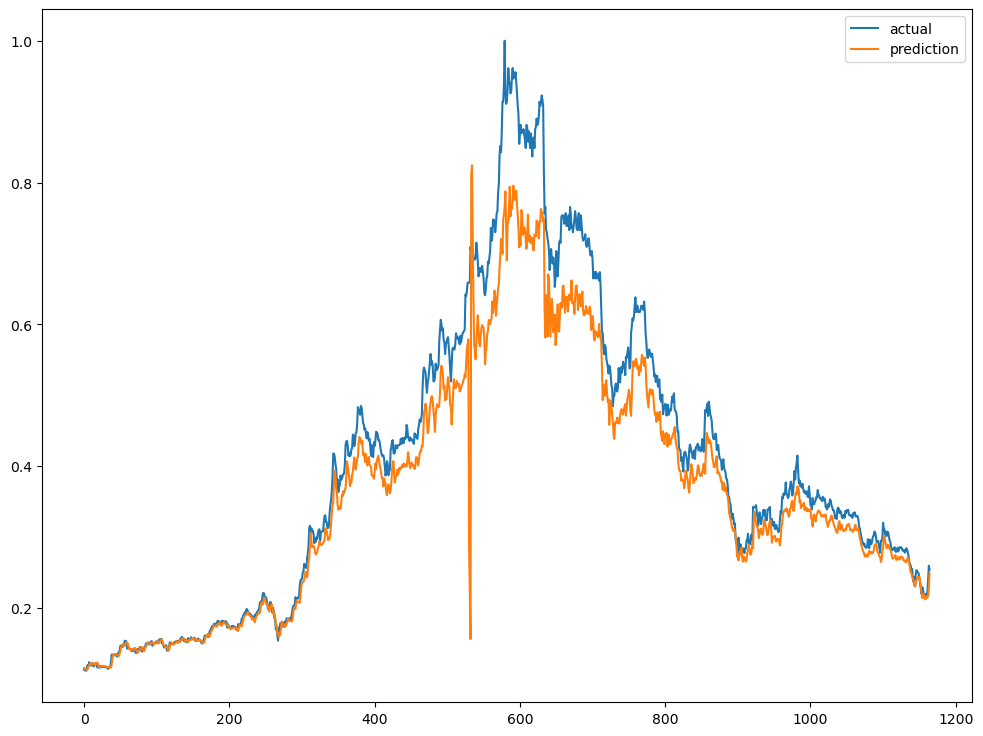

In [130]:
plt.figure(figsize=(12, 9))
plt.plot(ytest, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
scaler.inverse_transform(pred) #역정규화

In [131]:
df = pd.DataFrame(scaled, columns=cols)                            
xtrain,xtest,ytrain,ytest = train_test_split(df.drop("Close",axis = 1),df['Close'], test_size=0.2, random_state=0, shuffle=False)
vsta = np.hstack([xtest[20:],pred])
ans = scaler.inverse_transform(vsta)
ans[:,1]

array([20272., 20270., 20172., ..., 41550., 44700., 44750.])

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
import numpy as np

timesteps = 10
input_dim = 4
hidden_units = 8

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))

# 초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_units,)) 

print('초기 은닉 상태 :',hidden_state_t)

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


In [41]:
inputs

array([[0.38005472, 0.27526222, 0.33578983, 0.23343145],
       [0.24588435, 0.1535293 , 0.44292362, 0.6951648 ],
       [0.58347807, 0.94373314, 0.80465485, 0.43892542],
       [0.17070874, 0.20175234, 0.07443586, 0.79210952],
       [0.42293855, 0.20821401, 0.32093308, 0.55023993],
       [0.67107888, 0.95434257, 0.40821928, 0.38572199],
       [0.82457844, 0.52504732, 0.95504716, 0.63254871],
       [0.18011014, 0.91789434, 0.5545112 , 0.74961882],
       [0.26161778, 0.66937924, 0.4828287 , 0.19423086],
       [0.01339211, 0.20642763, 0.89367942, 0.53737374]])

In [42]:
Wx = np.random.random((hidden_units, input_dim))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_units, hidden_units)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_units,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
#코퍼스
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1 # 0부터 시작하니까
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 12


In [4]:
tokenizer.index_word # 0번 사용안함

{1: '말이',
 2: '경마장에',
 3: '있는',
 4: '뛰고',
 5: '있다',
 6: '그의',
 7: '법이다',
 8: '가는',
 9: '고와야',
 10: '오는',
 11: '곱다'}

In [5]:
tokenizer.word_index 

{'말이': 1,
 '경마장에': 2,
 '있는': 3,
 '뛰고': 4,
 '있다': 5,
 '그의': 6,
 '법이다': 7,
 '가는': 8,
 '고와야': 9,
 '오는': 10,
 '곱다': 11}

In [7]:
tokenizer.texts_to_sequences(['경마장에 있는 말이 뛰고 있다'])

[[2, 3, 1, 4, 5]]

In [6]:
sequences = list()
for line in text.split('\n'): # 줄바꿈 문자를 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0] #word_index의 인덱스로
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 11


In [8]:
sequences #학습하고자 하는 데이터셋, 입력길이 최저1 최고5 앞으로 더 긴 문장을 생각해 더 길게 줘도 됨

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [6, 1],
 [6, 1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11]]

In [10]:
max_len = max(len(l) for l in sequences) # 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


In [15]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre') #패딩, pre 0이 앞쪽부터, post 0이 뒷쪽

In [16]:
sequences

array([[ 0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  2,  3,  1],
       [ 0,  0,  2,  3,  1,  4],
       [ 0,  2,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  6,  1,  7],
       [ 0,  0,  0,  0,  8,  1],
       [ 0,  0,  0,  8,  1,  9],
       [ 0,  0,  8,  1,  9, 10],
       [ 0,  8,  1,  9, 10,  1],
       [ 8,  1,  9, 10,  1, 11]])

In [17]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [19]:
X

array([[ 0,  0,  0,  0,  2],
       [ 0,  0,  0,  2,  3],
       [ 0,  0,  2,  3,  1],
       [ 0,  2,  3,  1,  4],
       [ 0,  0,  0,  0,  6],
       [ 0,  0,  0,  6,  1],
       [ 0,  0,  0,  0,  8],
       [ 0,  0,  0,  8,  1],
       [ 0,  0,  8,  1,  9],
       [ 0,  8,  1,  9, 10],
       [ 8,  1,  9, 10,  1]])

In [20]:
y

array([ 3,  1,  4,  5,  1,  7,  1,  9, 10,  1, 11])

In [21]:
y = to_categorical(y, num_classes=vocab_size) # 예측값과 실제값 차이를 알기 위해서 원핫인코딩

In [22]:
y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [24]:
#임베딩 차원 10차원, 임베딩 - 단어를 벡터공간에 표현하는 것, 임베딩 벡터 공간 : 11차원(단어의 종류 개수)+1=12차원
embedding_dim = 10
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim)) # vocab_size 12차원, embedding_dim 10차원, 12차원 데이터를 10차원 공간 데이터로 표현해라
#임베딩 클래스 사용 목적 : 고차원의 데이터를 저차원으로 변화시켜 작업 속도 올려주기 위함
# [001000...0] => [1.3 -1.1 -0.3...3]
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 1s - loss: 2.5087 - accuracy: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 2/200
1/1 - 0s - loss: 2.4954 - accuracy: 0.0000e+00 - 4ms/epoch - 4ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4824 - accuracy: 0.0909 - 4ms/epoch - 4ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4697 - accuracy: 0.0909 - 3ms/epoch - 3ms/step
Epoch 5/200
1/1 - 0s - loss: 2.4573 - accuracy: 0.2727 - 4ms/epoch - 4ms/step
Epoch 6/200
1/1 - 0s - loss: 2.4449 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 7/200
1/1 - 0s - loss: 2.4325 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 8/200
1/1 - 0s - loss: 2.4200 - accuracy: 0.3636 - 4ms/epoch - 4ms/step
Epoch 9/200
1/1 - 0s - loss: 2.4073 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 10/200
1/1 - 0s - loss: 2.3943 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 11/200
1/1 - 0s - loss: 2.3810 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 12/200
1/1 - 0s - loss: 2.3672 - accuracy: 0.3636 - 3ms/epoch - 3ms/step
Epoch 13/200
1/1 - 0s - loss: 2.3529 - accuracy: 0.3636

Epoch 105/200
1/1 - 0s - loss: 0.5710 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 106/200
1/1 - 0s - loss: 0.5594 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 107/200
1/1 - 0s - loss: 0.5480 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 108/200
1/1 - 0s - loss: 0.5368 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 109/200
1/1 - 0s - loss: 0.5259 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 110/200
1/1 - 0s - loss: 0.5151 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 111/200
1/1 - 0s - loss: 0.5046 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 112/200
1/1 - 0s - loss: 0.4943 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 113/200
1/1 - 0s - loss: 0.4842 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 114/200
1/1 - 0s - loss: 0.4744 - accuracy: 0.9091 - 4ms/epoch - 4ms/step
Epoch 115/200
1/1 - 0s - loss: 0.4647 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 116/200
1/1 - 0s - loss: 0.4552 - accuracy: 0.9091 - 3ms/epoch - 3ms/step
Epoch 117/200
1/1 - 0s - loss: 0.4460 - 

In [25]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [39]:
print(sentence_generation(model, tokenizer, '고와야', 3))

고와야 있는 말이 뛰고


In [ ]:
# RNN 한계 - 중간 단어가 나오면 말을 완성 못시킴

In [40]:
import pandas as pd
import numpy as np
from string import punctuation

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [41]:
df = pd.read_csv('ArticlesApril2018.csv')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [42]:
print('열의 개수: ',len(df.columns))
print(df.columns)

열의 개수:  15
Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')


In [43]:
print(df['headline'].isnull().values.any()) # 결측값이 하나라도 있으면 True

False


In [50]:
headline=[]

In [51]:
headline.extend(list(df.headline.values))

In [53]:
headline

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?',
 'Commuter Reprogramming',
 'Unknown',
 'Unknown',
 'Ford Changed Leaders, Looking for a Lift. It’s Still Looking.',
 'Romney Failed to Win at Utah Convention, But Few Believe He’s Doomed',
 'Chain Reaction',
 'He Forced the Vatican to Investigate Sex Abuse. Now He’s Meeting With Pope Francis.',
 'In Berlin, artists find a home',
 'Unknown',
 'The Right Stuff',
 'Jimmy Carter Knows What North Korea Wants',
 'The Truth Is Out There',
 'New Jersey Ruling Could Reignite Battle Over Church-State Separation',
 'Procrastinating',
 'Word + Quiz: dilatory',
 'My Life-Threatening Bout With E. Coli Food Poisoning',
 'Choosing Brexit, a Town Yearned for Its Seafa

In [54]:
print('총 샘플의 개수 : {}'.format(len(headline)))

총 샘플의 개수 : 1324


In [55]:
headline = [word for word in headline if word != "Unknown"]
print('노이즈값 제거 후 샘플의 개수 : {}'.format(len(headline)))

노이즈값 제거 후 샘플의 개수 : 1214


In [56]:
headline

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?',
 'Commuter Reprogramming',
 'Ford Changed Leaders, Looking for a Lift. It’s Still Looking.',
 'Romney Failed to Win at Utah Convention, But Few Believe He’s Doomed',
 'Chain Reaction',
 'He Forced the Vatican to Investigate Sex Abuse. Now He’s Meeting With Pope Francis.',
 'In Berlin, artists find a home',
 'The Right Stuff',
 'Jimmy Carter Knows What North Korea Wants',
 'The Truth Is Out There',
 'New Jersey Ruling Could Reignite Battle Over Church-State Separation',
 'Procrastinating',
 'Word + Quiz: dilatory',
 'My Life-Threatening Bout With E. Coli Food Poisoning',
 'Choosing Brexit, a Town Yearned for Its Seafaring Past, and Muddied Its Future',
 'A Quote Disproved',
 'Hot Stuff Turns Cold',
 'At the Top,

In [57]:
def repreprocessing(raw_sentence):
    preproceseed_sentence = raw_sentence.encode("utf8").decode("ascii",'ignore')
    # 구두점 제거와 동시에 소문자화
    return ''.join(word for word in preproceseed_sentence if word not in punctuation).lower()

preprocessed_headline = [repreprocessing(x) for x in headline]
preprocessed_headline[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [58]:
punctuation # 특수문자들

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_headline)
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 3494


In [60]:
sequences = list()

for sentence in preprocessed_headline:

    # 각 샘플에 대한 정수 인코딩
    encoded = tokenizer.texts_to_sequences([sentence])[0] 
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

sequences[:11]

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

In [61]:
index_to_word = {}
for key, value in tokenizer.word_index.items(): # 인덱스를 단어로 바꾸기 위해 index_to_word를 생성
    index_to_word[value] = key

In [62]:
index_to_word

{1: 'the',
 2: 'a',
 3: 'to',
 4: 'of',
 5: 'in',
 6: 'for',
 7: 'and',
 8: 'is',
 9: 'on',
 10: 'with',
 11: 'trump',
 12: 'as',
 13: 'at',
 14: 'new',
 15: 'how',
 16: 'from',
 17: 'it',
 18: 'an',
 19: 'that',
 20: 'be',
 21: 'season',
 22: 'us',
 23: 'you',
 24: 'its',
 25: 'what',
 26: 'episode',
 27: 'can',
 28: 'your',
 29: 'not',
 30: 'he',
 31: 'now',
 32: 'his',
 33: 'are',
 34: 'teaching',
 35: 'war',
 36: 'out',
 37: 'no',
 38: 'was',
 39: 'by',
 40: 'trumps',
 41: 'has',
 42: 'over',
 43: 'may',
 44: 'into',
 45: 'why',
 46: 'more',
 47: 'we',
 48: 'who',
 49: 'about',
 50: 'recap',
 51: 'activities',
 52: '1',
 53: 'just',
 54: 'do',
 55: 'women',
 56: 'when',
 57: 'syria',
 58: 'trade',
 59: 'i',
 60: '2',
 61: 'or',
 62: 'will',
 63: 'this',
 64: 'have',
 65: 'president',
 66: 'but',
 67: 'home',
 68: 'up',
 69: 'long',
 70: 'one',
 71: 'off',
 72: 'facebook',
 73: 'house',
 74: 'gop',
 75: 'our',
 76: 'case',
 77: 'they',
 78: 'life',
 79: 'end',
 80: 'right',
 81: 'so

In [63]:
sequences

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3],
 [100, 3, 1117],
 [100, 3, 1117, 2],
 [100, 3, 1117, 2, 14],
 [100, 3, 1117, 2, 14, 583],
 [100, 3, 1117, 2, 14, 583, 24],
 [100, 3, 1117, 2, 14, 583, 24, 1118],
 [100, 3, 1117, 2, 14, 583, 24, 1118, 373],
 [100, 3, 1117, 2, 14, 583, 24, 1118, 373, 374],
 [100, 3, 1117, 2, 14, 583, 24, 1118, 373, 374, 5],
 [100, 3, 1117, 2, 14, 583, 24, 1118, 373, 374, 5, 1119],
 [1, 14],
 [1, 14, 1120],
 [1, 14, 1120, 1121],
 [15, 2],
 [15, 2, 584],
 [15, 2, 584, 4],
 [15, 2, 584, 4, 215],
 [15, 2, 584, 4, 215, 375],
 [15, 2, 584, 4, 215, 375, 1122],
 [15, 2, 584, 4, 215, 375, 1122, 2],
 [15, 2, 584, 4, 215, 375, 1122, 2, 376],
 [15, 2, 584, 4, 215, 375, 1122, 2, 376, 

In [65]:
len(sequences)

7803

In [66]:
max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 24


In [67]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [68]:
sequences

array([[   0,    0,    0, ...,    0,   99,  269],
       [   0,    0,    0, ...,   99,  269,  371],
       [   0,    0,    0, ...,  269,  371, 1115],
       ...,
       [   0,    0,    0, ...,    8, 3493,  115],
       [   0,    0,    0, ..., 3493,  115,    2],
       [   0,    0,    0, ...,  115,    2, 1025]])

In [69]:
sequences = np.array(sequences) #훈련할 때 어레이로 집어넣어야 하기 때문
X = sequences[:,:-1]
y = sequences[:,-1]

In [76]:
X.shape

(7803, 23)

In [71]:
y

array([ 269,  371, 1115, ...,  115,    2, 1025])

In [72]:
vocab_size #3494 차원

3494

In [73]:
y = to_categorical(y, num_classes=vocab_size)

In [75]:
y.shape
# (7803, 3494) 7803개 훈련 문장에 대한 정답에 해당되는 7803개의 단어
#각 단어는 3494차원으로 원핫인코딩 되어있음

(7803, 3494)

In [ ]:
#LSTM

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

In [78]:
embedding_dim = 10
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim)) #3494 -> 10
model.add(LSTM(hidden_units)) # LSTM 셀 출력 128
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
244/244 - 5s - loss: 7.6509 - accuracy: 0.0265 - 5s/epoch - 20ms/step
Epoch 2/200
244/244 - 3s - loss: 7.1032 - accuracy: 0.0314 - 3s/epoch - 13ms/step
Epoch 3/200
244/244 - 3s - loss: 6.9688 - accuracy: 0.0383 - 3s/epoch - 11ms/step
Epoch 4/200
244/244 - 3s - loss: 6.8408 - accuracy: 0.0417 - 3s/epoch - 11ms/step
Epoch 5/200
244/244 - 3s - loss: 6.6849 - accuracy: 0.0450 - 3s/epoch - 11ms/step
Epoch 6/200
244/244 - 3s - loss: 6.5108 - accuracy: 0.0483 - 3s/epoch - 11ms/step
Epoch 7/200
244/244 - 3s - loss: 6.3255 - accuracy: 0.0518 - 3s/epoch - 11ms/step
Epoch 8/200
244/244 - 3s - loss: 6.1303 - accuracy: 0.0586 - 3s/epoch - 11ms/step
Epoch 9/200
244/244 - 3s - loss: 5.9406 - accuracy: 0.0620 - 3s/epoch - 11ms/step
Epoch 10/200
244/244 - 3s - loss: 5.7558 - accuracy: 0.0670 - 3s/epoch - 11ms/step
Epoch 11/200
244/244 - 3s - loss: 5.5847 - accuracy: 0.0702 - 3s/epoch - 11ms/step
Epoch 12/200
244/244 - 3s - loss: 5.4184 - accuracy: 0.0768 - 3s/epoch - 11ms/step
Epoch 13/200


Epoch 100/200
244/244 - 3s - loss: 0.6539 - accuracy: 0.8702 - 3s/epoch - 12ms/step
Epoch 101/200
244/244 - 3s - loss: 0.6399 - accuracy: 0.8758 - 3s/epoch - 12ms/step
Epoch 102/200
244/244 - 3s - loss: 0.6250 - accuracy: 0.8774 - 3s/epoch - 12ms/step
Epoch 103/200
244/244 - 3s - loss: 0.6135 - accuracy: 0.8802 - 3s/epoch - 12ms/step
Epoch 104/200
244/244 - 3s - loss: 0.6005 - accuracy: 0.8806 - 3s/epoch - 12ms/step
Epoch 105/200
244/244 - 3s - loss: 0.5888 - accuracy: 0.8818 - 3s/epoch - 12ms/step
Epoch 106/200
244/244 - 3s - loss: 0.5767 - accuracy: 0.8866 - 3s/epoch - 12ms/step
Epoch 107/200
244/244 - 3s - loss: 0.5643 - accuracy: 0.8882 - 3s/epoch - 12ms/step
Epoch 108/200
244/244 - 3s - loss: 0.5532 - accuracy: 0.8898 - 3s/epoch - 12ms/step
Epoch 109/200
244/244 - 3s - loss: 0.5403 - accuracy: 0.8902 - 3s/epoch - 12ms/step
Epoch 110/200
244/244 - 3s - loss: 0.5302 - accuracy: 0.8930 - 3s/epoch - 12ms/step
Epoch 111/200
244/244 - 3s - loss: 0.5216 - accuracy: 0.8959 - 3s/epoch - 12

Epoch 198/200
244/244 - 3s - loss: 0.2976 - accuracy: 0.9091 - 3s/epoch - 12ms/step
Epoch 199/200
244/244 - 3s - loss: 0.2840 - accuracy: 0.9132 - 3s/epoch - 12ms/step
Epoch 200/200
244/244 - 3s - loss: 0.2651 - accuracy: 0.9163 - 3s/epoch - 12ms/step


In [79]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')

        # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [80]:
print(sentence_generation(model, tokenizer, 'i', 10))

i want to be rich and im not sorry gay future


In [81]:
print(sentence_generation(model, tokenizer, 'how', 10))

how to make a crossword puzzle the afghan explores virtual currency
